In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class KMeans:
    """
    Algoritmo de clustering K-Means

    Parametros:
        k (int): Número de clusters a encontrar (por defecto 3)
        max_iter (int): Número maximo de iteraciones (por defecto 100)
        centroids (numpy.ndarray): Cordenadas iniciales del centroides (por defecto ninguna)
    """
    def __init__(self, k=3, max_iter=100, centroids = None):
        """
        Constructor de objetos kMeans

        Parametros:
            k (int): Número de cluster
            max_iter (int): Número maximo de iteraciones
        """
        self.k = k
        self.max_iter = max_iter
        self.centroids = centroids

    def distancia_euclideana(self, p1, p2):
        """
        Calcula la distancia Euclideana entre dos puntos.

        Parametros:
            point1 (numpy.ndarray): Primer punto
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: La distancia euclideana entre los dos puntos
        """
        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):
        """
        Calcula la distancia de Manhattan entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: Distancia de Manhattan entre dos puntos
        """
        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):
        """
        Cacula la distancia de Mahalanobis entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto.
            covariance_matrix (numpy.ndarray): Matrix de covarancia de los datos.

        Returns:
            float: La distancia de Mahalanobis entre dos puntos
        """
        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):
        """
        Calcula los centroides de la nube de puntos dada por la asignación en la variable labels

        Parametros:
            points (numpy.ndarray): Nube de puntos
            labels (numpy.ndarray): Cluster asignado para cada punto

        Returns:
            numpy.ndarray: Centroides de cada cluster
        """

        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):
        """
        Ejecuta un algoritmo K-Means dado la nube de puntos recibida como parametro

        Parametros:
            points (numpy.ndarray): Nube de puntos
            tipo_distance (str): Tipo de distancia a utilizar ('euclidean', 'manhattan', or 'mahalanobis'). Por defecto  'euclidean'.

        Returns:
            numpy.ndarray: El cluster asignado a cada grupo
        """

        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'manhattan':
                    distances = [self.distancia_manhattan(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'mahalanobis':
                    covariance_matrix = np.cov(points, rowvar=False)
                    distances = [self.distancia_mahalanobis(point, centroid, covariance_matrix) for centroid in self.centroids]
                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

In [ ]:
def dibujar2D (points, centroids, labels):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(points[:, 0], points[:, 1], c='blue', label='Puntos')
    plt.title('Antes de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', label='Puntos')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroides finales')
    plt.title('Despues de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.tight_layout()
    plt.show()

def dibujar3D (points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()


    # Plot the points and final centroids
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# **PUNTO 1**

[[ 5.22054811 -4.40112225]
 [ 0.14926918  8.86739812]
 [-6.14212703  0.73255201]]


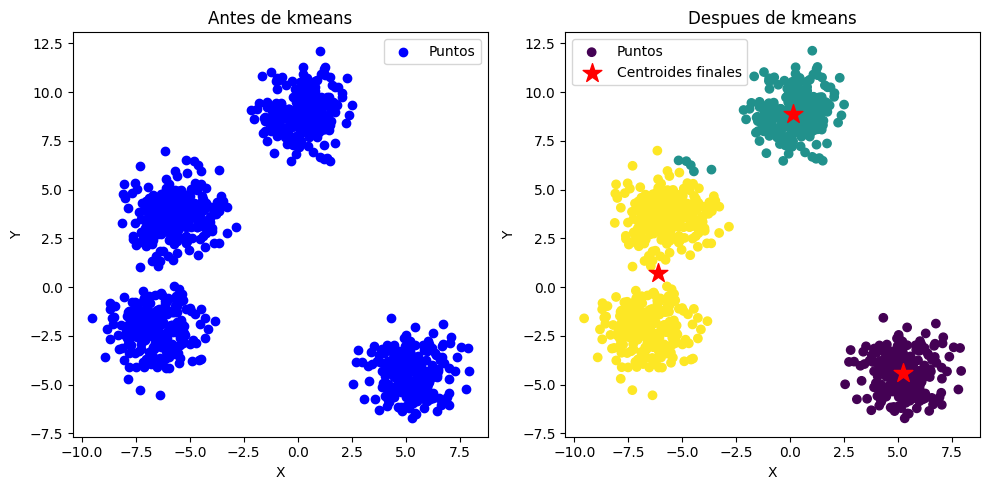

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=10000) #se cambio max_iter por 10, 100, 1000, 10000 como fue solicitado en el ejecrcio
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar2D(points, kmeans.centroids, labels)

*En los resultados obtenidos en tres de los cuatro experimentos documentados en la presentación, los resultados fueron muy similares en todas las iteraciones (10, 100, 1,000 y 10,000). Aunque hubieron casos donde hubieron cambios, es importante resalta que es debió a los centroides que se generan de manera aleatoria en cada ejecución. Como mencionamos anteriormente, esta aleatoriedad en cada experimentos, hace que los centroides puede afectar la convergencia y la distribución final de los puntos en cada agrupamiento.*

# **PUNTO 2**

[[ 0.1900574   9.35235296  4.69229524]
 [-4.33107149 -5.88573215  4.53074681]
 [ 0.41014194  8.361376    5.88354603]]


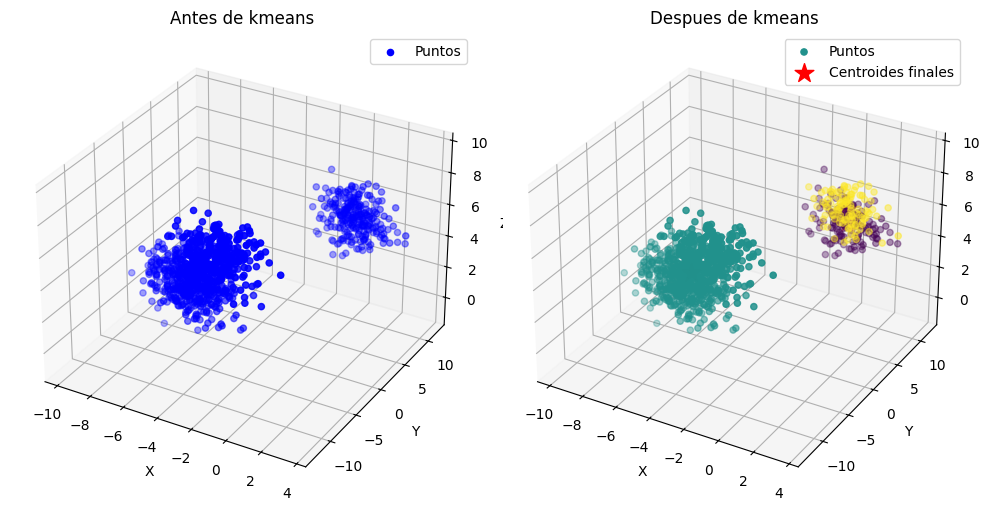

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=10000) #se cambio max_iter por 10, 100, 1000, 10000 como fue solicitado en el ejecrcio
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

*El resultado de los experimentos del grupo siempre fue el mismo. Lo único que varió fue el color de los grupos, pero en todas las iteraciones (10, 100, 1,000 y 10,000), la agrupación fue consistente. Lo que se observó fue que la convergencia de los centroides fue idéntica, independientemente de que los centroides se generaran aleatoriamente al inicio del proceso.*

# **Punto 3, como no se puede ver graficamente el resultado se decide el fragmento de codigo con todas las iteraciones: 10, 100, 1.000 y 10.000**

In [86]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 10,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=10)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)

[[-10.02840443   7.68465445   7.65965393  -4.15131199   1.70703965
    9.57025198   6.9194212   -8.58774896  -4.19592485  -4.19288259]
 [  0.31826225   8.84020816   5.3077049   -4.44723633  -5.64555953
    3.67384586  -6.82619734  -2.09246799   2.35049037  -1.67616111]
 [  6.46743022   3.4922052   -7.76135099  -4.10560829   0.74110667
   -7.7924616    2.49186129  -1.89450546   0.30378982  -0.23369619]]


In [87]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 10,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=100)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)

[[  6.46743022   3.4922052   -7.76135099  -4.10560829   0.74110667
   -7.7924616    2.49186129  -1.89450546   0.30378982  -0.23369619]
 [-10.02840443   7.68465445   7.65965393  -4.15131199   1.70703965
    9.57025198   6.9194212   -8.58774896  -4.19592485  -4.19288259]
 [  0.31826225   8.84020816   5.3077049   -4.44723633  -5.64555953
    3.67384586  -6.82619734  -2.09246799   2.35049037  -1.67616111]]


In [88]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 10,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=1000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)

[[  6.46743022   3.4922052   -7.76135099  -4.10560829   0.74110667
   -7.7924616    2.49186129  -1.89450546   0.30378982  -0.23369619]
 [-10.02840443   7.68465445   7.65965393  -4.15131199   1.70703965
    9.57025198   6.9194212   -8.58774896  -4.19592485  -4.19288259]
 [  0.31826225   8.84020816   5.3077049   -4.44723633  -5.64555953
    3.67384586  -6.82619734  -2.09246799   2.35049037  -1.67616111]]


In [89]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 10,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=10000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)

[[ 6.5232213   4.38290001 -7.61461494  1.83942529 -7.37684894 -8.43656566
   6.61427073 -0.80877943 -6.73114212  0.89878175]
 [ 0.31826225  8.84020816  5.3077049  -4.44723633 -5.64555953  3.67384586
  -6.82619734 -2.09246799  2.35049037 -1.67616111]
 [-1.80838264  5.14308242 -0.12421656 -7.10097692  5.28305097  1.21094722
   2.64443652 -5.78399023  1.57139845 -2.77952836]]


*El resultado de los experimentos del grupo en este punto si vario un poco. en las iteraciones (10, 100, 1,000 y 10,000), Aunque si hubieron cambios no fue muy drastiga, sino el cambio fue poco.*

# **PUNTO 4 100D, como no se puede ver graficamente el resultado se decide el fragmento de codigo con todas las iteraciones: 10, 100, 1.000 y 10.000**

In [90]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 100,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=10)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)

[[  2.84265144   1.32400743  -5.28249388  -4.0172941   -9.87313692
   -7.45481339   0.58051583   2.94895555  -7.10721314   3.81968878
    2.09417167   9.14902498   6.86457226   0.29789938   2.02062953
   -8.22164427   9.10333326   7.85354709   1.22754647  -4.32416579
    2.76710495  -1.7177258    2.52074741  -2.1383519   -3.99887882
   -2.1494978    7.01443643   6.83461931  -4.30339683  -3.16807851
   -0.42249711  -2.24560294  -3.40557429   0.44690177  -8.17626338
   -9.52750514  -6.23726017   9.21867184   5.21005457   0.53561365
   -7.55277574   9.93845249   7.75398921   9.20969956   1.37218027
   -4.00766092  -6.36506161   5.57404596  -6.91605211   2.02694169
    4.78647259   1.39680071   5.89479567   8.56508793  -8.31865718
   -7.61446413  -7.74933414  -4.16187031   1.03083337  -1.04747727
   -0.98871253   3.84203291  -7.12204633  -7.75464303  -7.14763912
    6.95869011  -2.58344495   2.34300891   8.08120047  -6.3724177
   -8.92753961  -4.76068482  -2.30592011   0.76394441  -5.89759

In [91]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 100,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=100)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)

[[-8.66450779  4.52166177 -7.56625305  6.210034    8.71909492 -3.16774364
  -3.78039941  1.97523348  3.93706863 -9.09308048  2.45321869 -6.61120957
  -8.43029548 -3.77580495 -1.63761173 -2.12915348  4.40979787  0.22204306
  -3.12803545 -0.58586543  0.9419653   6.71797143 -3.01283007  5.68687331
   2.93997049  7.46247522 -1.83324408 -6.31929766 -8.2370414   1.11948783
   9.51774637 -4.05525822 -2.15529764  6.30627532 -2.0123147   7.82369977
  -9.33426049  7.87353153 -4.17846605  9.63404477  5.47773861  6.31515679
  -0.45123904 -3.9219301  -3.44366006  7.65306357 -1.43803902 -9.98836141
   2.42873296  2.75221614  1.96909477 -8.32978852 -6.30753753  5.44041875
   1.87944931  3.57540091 -8.52946575  1.13767696 -4.828454   -5.57849729
  -7.73254993 -8.05057105 -5.07759937  4.96843335  1.92376118  0.74191374
  -2.48917942 -5.21121284  1.89912183  6.8207713  -0.42557516 -8.25281183
   8.64489123 -0.42550856 -7.56826266  6.73303162 -2.30102586 -7.86441478
   9.09740667 -3.02250411 -5.77131218 

In [92]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 100,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=1000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)

[[ 2.84265144  1.32400743 -5.28249388 -4.0172941  -9.87313692 -7.45481339
   0.58051583  2.94895555 -7.10721314  3.81968878  2.09417167  9.14902498
   6.86457226  0.29789938  2.02062953 -8.22164427  9.10333326  7.85354709
   1.22754647 -4.32416579  2.76710495 -1.7177258   2.52074741 -2.1383519
  -3.99887882 -2.1494978   7.01443643  6.83461931 -4.30339683 -3.16807851
  -0.42249711 -2.24560294 -3.40557429  0.44690177 -8.17626338 -9.52750514
  -6.23726017  9.21867184  5.21005457  0.53561365 -7.55277574  9.93845249
   7.75398921  9.20969956  1.37218027 -4.00766092 -6.36506161  5.57404596
  -6.91605211  2.02694169  4.78647259  1.39680071  5.89479567  8.56508793
  -8.31865718 -7.61446413 -7.74933414 -4.16187031  1.03083337 -1.04747727
  -0.98871253  3.84203291 -7.12204633 -7.75464303 -7.14763912  6.95869011
  -2.58344495  2.34300891  8.08120047 -6.3724177  -8.92753961 -4.76068482
  -2.30592011  0.76394441 -5.89759689  5.17259232  2.3744691   5.5151523
  -6.21147153 -5.2360162   2.8439946  -2

In [93]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 100,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=10000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)

[[ 7.00571036 -3.061341   -7.14928586 -6.35658658 -6.60625375 -1.46239639
   1.96061447 -8.05809522 -9.39035692 -8.34885041 -4.34853765 -3.19061322
   5.57347605  4.8947242  -7.78241387 -0.52166824  2.91157363  6.93436488
  -2.2756107  -3.52650734 -1.65342588 -1.22534697  2.48508475  9.95701249
   3.04847523  2.68889987  0.65952162 -2.95051804  7.09302842 -6.73638284
   5.30159747  5.14349898 -9.05603902 -0.94432828  4.2450323   1.41565337
  -2.76416184 -4.66792743 -9.0365786  -8.33349219  9.8571228   2.62566262
   5.85608204 -9.65773695 -7.71609469 -2.1730255   6.94418111 -3.99755435
  -6.0461467   7.40831657  7.80942121  9.5993876  -8.31683291 -1.06640685
  -5.55795846  6.02005395 -3.04510585 -5.62448103  6.21560682 -0.4701928
  -9.02345248 -2.40351245 -0.13937558  3.5951609  -4.12524795 -9.69082804
   2.01935604  6.32555512 -5.72584598  2.64260965  4.46698744  9.28846135
  -8.11398548  3.61693618  1.31927284 -6.64026108 -0.7429463  -9.83383009
  -9.51771118 -9.61675488 -1.9886011   

Al realizar las pruebas con K-Means en 100 dimensiones (100D), los centroides obtenidos al final de las iteraciones mostraron ciertas características consistentes y algunas variaciones mínimas. El análisis de los resultados de los centroides en 10, 100, 1,000 y 10,000 iteraciones reveló lo siguiente:

En las primeras iteraciones (10, 100, 1,000), los centroides fueron bastante

1.   En las primeras iteraciones (10, 100, 1,000), los centroides fueron bastante similares, con pequeños cambios entre las iteraciones. Esto indica que el algoritmo encontró una solución estable rápidamente, y los centroides ya estaban bastante definidos incluso con pocas iteraciones.
2.  En la iteración de 10,000, aunque los centroides no cambiaron drásticamente, se observó una ligera diferencia en los valores, especialmente en el primer centroide. Sin embargo, las diferencias fueron mínimas, lo que sugiere que el algoritmo había alcanzado la convergencia mucho antes de llegar a las 10,000 iteraciones.

**-Analisis hecho con chatgpt**


# **PUNTO 5, variacion en K**

[[-4.33107149 -5.88573215  4.53074681]
 [ 0.28513392  8.92425092  5.20691558]]


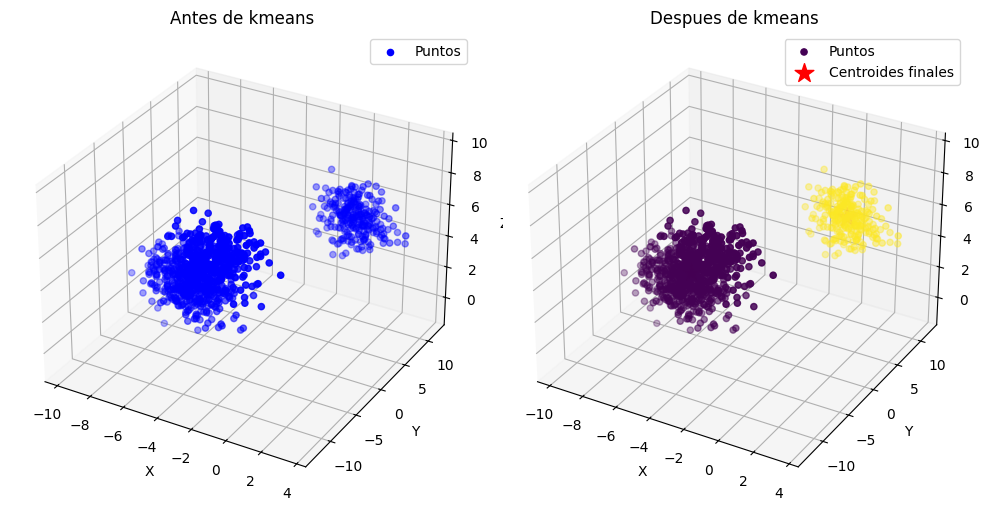

In [94]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)
kmeans = KMeans(k=2, max_iter=1000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

[[-4.33107149 -5.88573215  4.53074681]
 [-0.24018245  9.21498237  5.70540808]
 [ 0.85422665  8.60929184  4.66688204]]


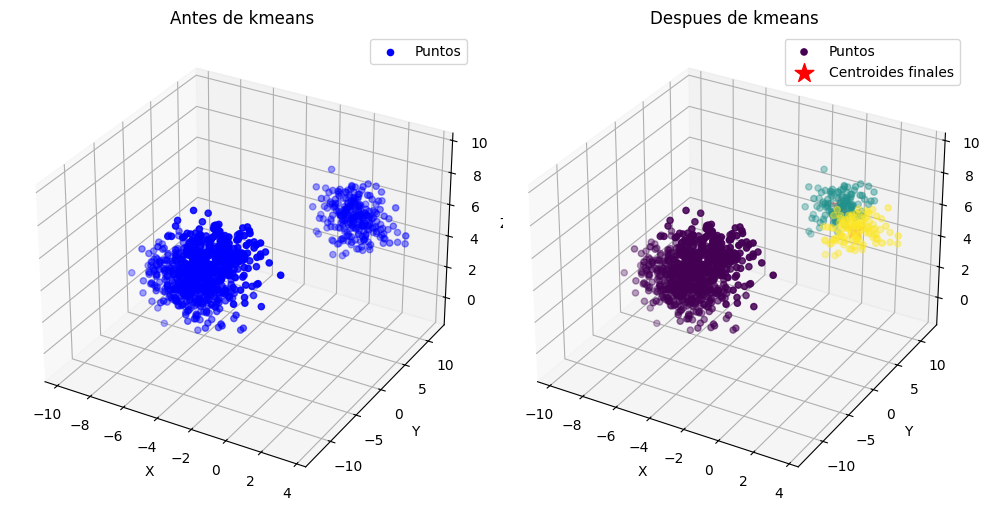

In [95]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=1000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

[[-5.59637388 -3.77444934  2.9720632 ]
 [-0.22266237  8.87489774  4.1178713 ]
 [ 1.19317385  8.45473887  5.21204125]
 [-1.87489628 -9.98410468  7.55642675]
 [-0.15855563  9.34142005  5.85822688]]


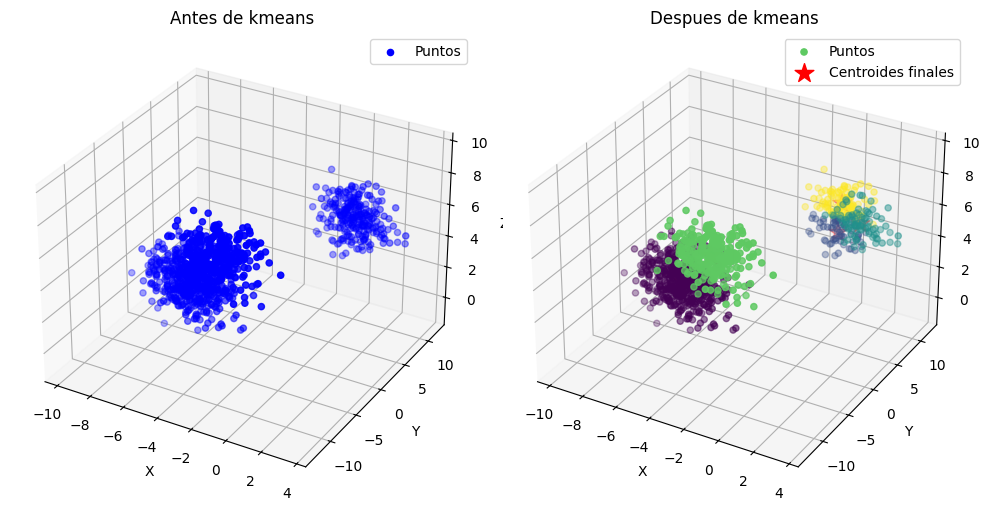

In [96]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)
kmeans = KMeans(k=5, max_iter=1000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

[[ -3.59481764  -5.6337517    3.54380773]
 [ -2.49235529 -10.41877851   7.78107796]
 [ -0.30334363   9.61264967   4.75492806]
 [ -5.30016258  -5.35978402   3.63737075]
 [  0.42338219   7.77104299   4.86202149]
 [  1.46744026   9.22542457   4.3960736 ]
 [ -6.74396426  -2.01057849   2.35226788]
 [ -1.02427297  -9.57707178   7.41952165]
 [ -0.77890762   8.70534066   5.96103283]
 [  0.76989534   9.07112337   6.25150326]]


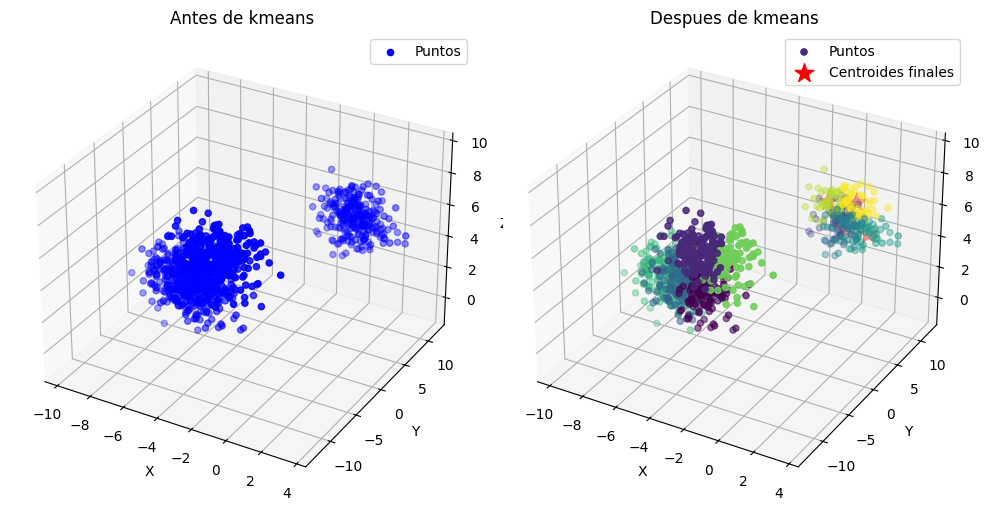

In [97]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)
kmeans = KMeans(k=10, max_iter=1000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

Diferente a lo que observamos a simple vista que es obvio, que cuando aumentamos los k, aparecen mas grupos, hemos visto que los centroide cuando k=3, 2 de ellos tienden a ser muy parecido (ubicación) a los dos centroide de k=2 y es una tendencia que se repite en k=5 con los centroide de k= 3 y asi

# **PUNTO 6**

**PUNTO 6 Distancia Euclidiana**

[[-5.65576678  3.72665982]
 [-0.0650591   8.30023453]
 [ 0.68280532  9.8045404 ]
 [-6.5964512  -2.15146931]
 [ 5.22054811 -4.40112225]]


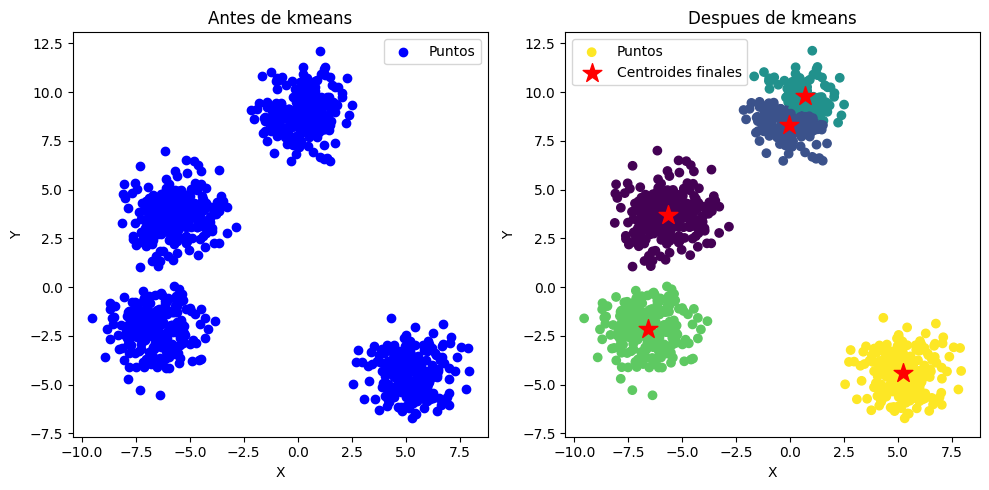

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)
kmeans = KMeans(k=5, max_iter=1000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar2D(points, kmeans.centroids, labels)

**PUNTO 6 Distancia manhattan**

[[-6.59871777 -2.12592069]
 [-5.64587749  3.74810339]
 [ 5.22054811 -4.40112225]
 [ 0.53620792  9.81182684]
 [ 0.02371337  8.25270396]]


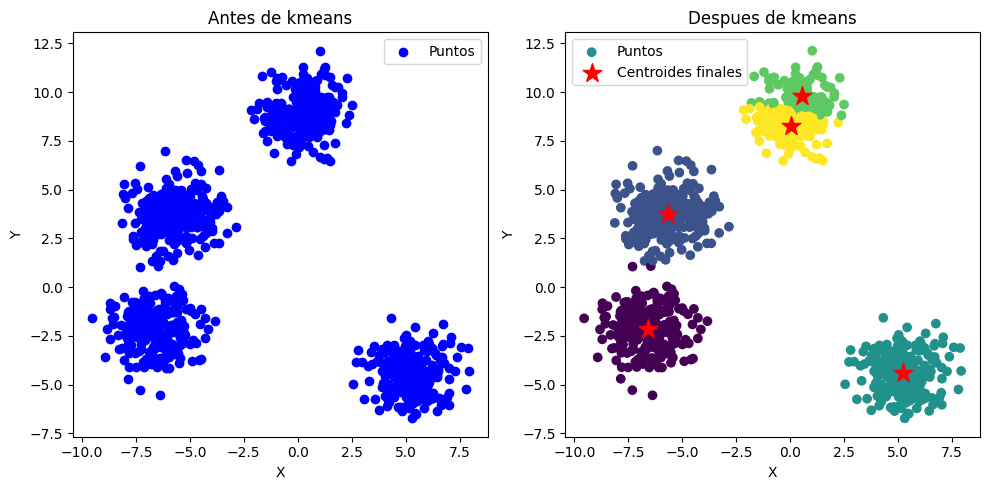

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)
kmeans = KMeans(k=5, max_iter=1000)
labels = kmeans.run(points, tipo_distance="manhattan")
#print(labels)
print(kmeans.centroids)
dibujar2D(points, kmeans.centroids, labels)

**PUNTO 6 Distancia mahalanobis**

[[ 0.24306104  8.92000855]
 [-5.84861733 -1.6738002 ]
 [ 5.22054811 -4.40112225]
 [-5.64587749  3.74810339]
 [-7.22836413 -2.50543789]]


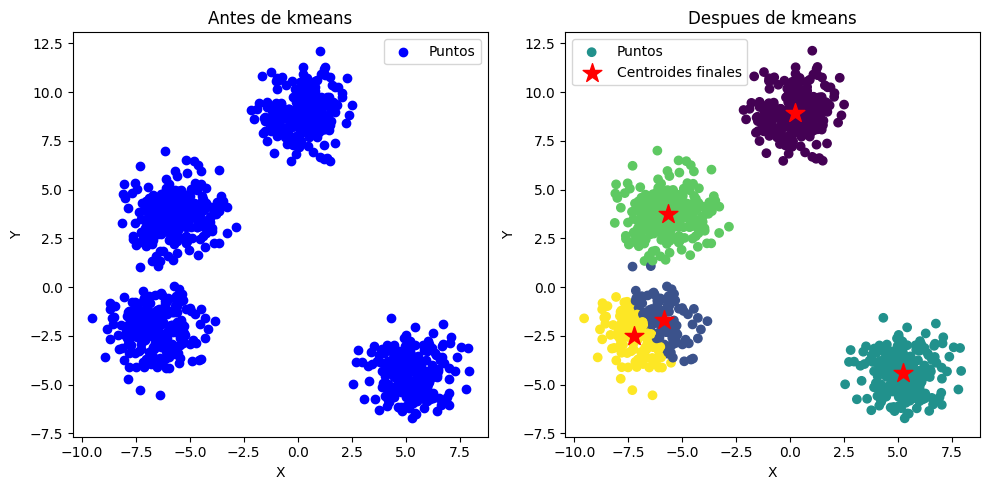

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)
kmeans = KMeans(k=5, max_iter=1000)
labels = kmeans.run(points, tipo_distance="mahalanobis")
#print(labels)
print(kmeans.centroids)
dibujar2D(points, kmeans.centroids, labels)

*Los resultado sin importar que distancia de usaba tendio a ser lo mismo, teniendo presente para este experimentos que se usaron 1000 iteraciones. Los cambios mas "drastigos" tuvieron totalmente relacionado por la  aleatoriedad de los centroide.*

# **PUNTO 7**

**Buscando convergencia del punto 1**

[[ 5.22054811 -4.40112225]
 [ 0.14926918  8.86739812]
 [-6.14212703  0.73255201]]


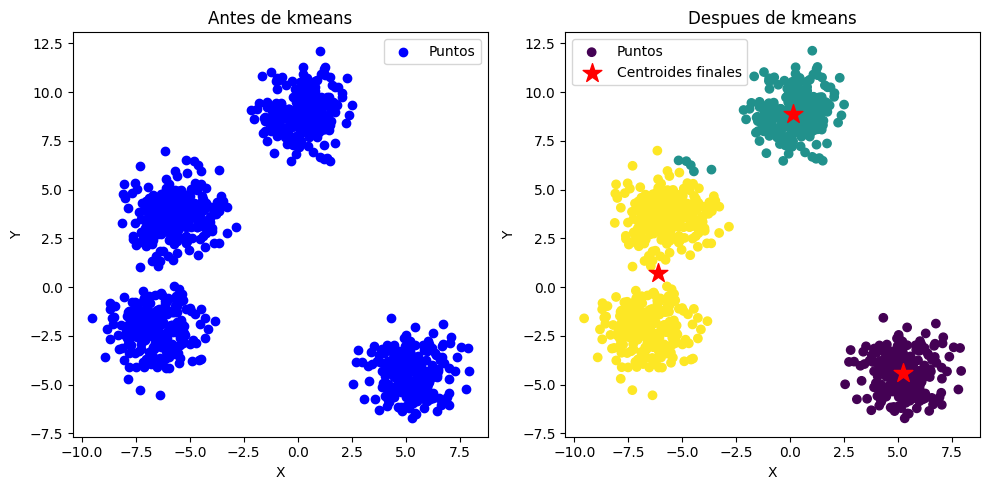

In [120]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=9)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar2D(points, kmeans.centroids, labels)

*En el punto 1, analizando los graficos obtenidos necesitamos entre 6 a 10 iteraciones para tener la convergencia de los centroide, ya despues de ese numero los resultado de estos no cambiaban mucho a modos que tuvieran afectado por la aleatoriedad.*

**Buscando convergencia del punto 2**

[[ 0.28513392  8.92425092  5.20691558]
 [-5.59637388 -3.77444934  2.9720632 ]
 [-1.87489628 -9.98410468  7.55642675]]


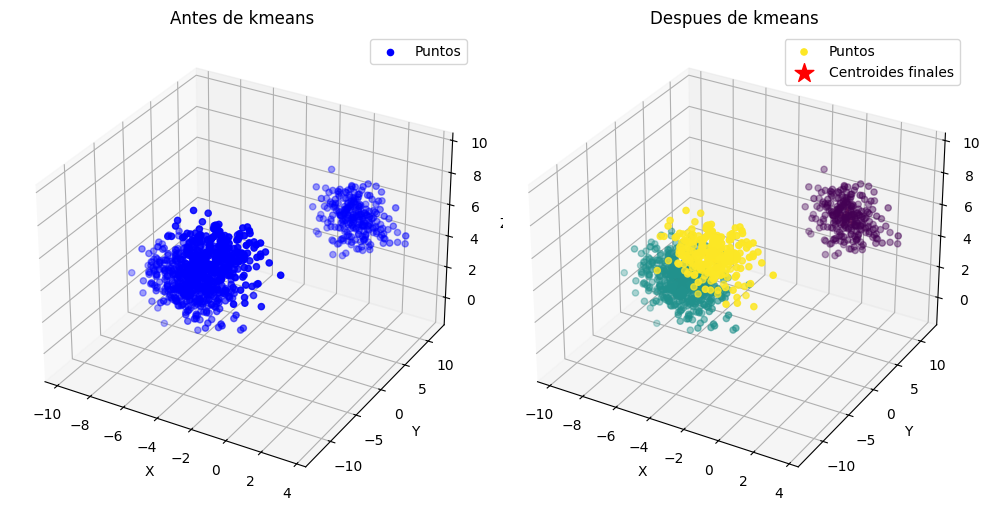

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=20)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

*En el punto 2, tuvimos la misma situacion del punto 1, despues de analizar variarias iteraciones llegamos a la conclusion que se necesitan entre 6 a 10 iteraciones para tener la convergencia de los centroide*

**Buscando convergencia del PUNTO 3, como no pododemos graficar dejamos la evidencia de todas las iteraciones**

In [121]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 10,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=5)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)

[[-7.35655567  8.04606739  7.04166773 -4.31435577 -0.15896311  8.1431649
   3.27726091 -6.86819455 -2.4031995  -3.70872918]
 [ 5.75352541  3.85018409 -5.89568795 -6.38295435  2.93140888 -5.71706398
  -0.51651211 -2.07837796  3.31220927 -0.93321235]
 [ 3.83227726  6.20521876 -2.530389   -0.59005393 -6.8519599  -4.07243723
   1.42806003 -1.72697155 -3.26988485  0.21494079]]


In [122]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 100,n_features = 10,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=10)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)

[[ 3.34000253  5.87833616 -1.20266139 -7.12438922  1.31933668 -1.84523939
  -4.0579808  -2.61925424  4.71852638 -1.44580567]
 [-9.92451056  7.19646287  7.14510121 -4.35948497  1.60415402  9.71583796
   6.66491176 -8.70990153 -3.7861592  -4.17482524]
 [ 6.41689445  4.01199462 -7.5526175   2.03894144 -7.55761082 -8.98550764
   6.37454627 -0.64522434 -6.62279386  1.03548932]]


In [124]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 10,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=15)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)

[[ -4.85507109   8.26243131   6.48367942  -4.29927416  -1.96925994
    6.62204892   0.04661193  -5.34010847  -0.92271724  -2.93452185]
 [  6.5232213    4.38290001  -7.61461494   1.83942529  -7.37684894
   -8.43656566   6.61427073  -0.80877943  -6.73114212   0.89878175]
 [  6.41163915   2.6015104   -7.90808704 -10.05064186   8.85906228
   -7.14835754  -1.63054815  -2.9802315    7.33872176  -1.36617414]]


*Vimos que en este punto (3), se necesitan un poco mas, donde el rango que vimos esta entre 10 y 16 en nuestros experimentos, donde ya vimos el cambio muy, pero muy minimo*

**Buscando convergencia del PUNTO 4= 100D y se deja evidencia de todas las iteraciones ya que no podemos graficar los resultados**

In [119]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 100,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=700)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)

[[  0.45255654   8.89956707   5.32677546  -4.41659372  -5.7532101
    3.70427542  -6.74796109  -2.24267121   2.39724743  -1.73363529
  -10.08125311   7.67018943   7.68294114  -4.08768023   1.78140331
    9.55642018   6.83903625  -8.83598278  -4.03079997  -4.36539701
    6.26211973   2.50624058  -7.87023065 -10.01667912   8.80599681
   -6.99255018  -1.58899557  -2.91566848   7.34885498  -1.41894201
    6.48207464   4.36941096  -7.54937836   1.85586713  -7.44401575
   -8.60170005   6.678562    -0.78176993  -6.79919443   0.87601432
    1.74752794   5.40981059   3.13389689   1.0598906   -6.34942561
   -5.19400099   0.15261993  -1.91496431  -0.34148495   9.19363107
    8.07414965   0.19676056   6.46161622   6.45543921  -5.32621169
   -8.37710965  -0.66219377   7.62143186  -7.05884378  -5.30694169
    8.36031108  -7.39885861   8.25633114  -5.34075512   2.3583708
    9.01088811  -4.96536499  -1.00619162   9.28877187  -5.06307328
   -6.03283357   3.71596473   6.92448563  -0.94771951  -7.965861

In [115]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 100,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=1000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)

[[  7.00571036  -3.061341    -7.14928586  -6.35658658  -6.60625375
   -1.46239639   1.96061447  -8.05809522  -9.39035692  -8.34885041
   -4.34853765  -3.19061322   5.57347605   4.8947242   -7.78241387
   -0.52166824   2.91157363   6.93436488  -2.2756107   -3.52650734
   -1.65342588  -1.22534697   2.48508475   9.95701249   3.04847523
    2.68889987   0.65952162  -2.95051804   7.09302842  -6.73638284
    5.30159747   5.14349898  -9.05603902  -0.94432828   4.2450323
    1.41565337  -2.76416184  -4.66792743  -9.0365786   -8.33349219
    9.8571228    2.62566262   5.85608204  -9.65773695  -7.71609469
   -2.1730255    6.94418111  -3.99755435  -6.0461467    7.40831657
    7.80942121   9.5993876   -8.31683291  -1.06640685  -5.55795846
    6.02005395  -3.04510585  -5.62448103   6.21560682  -0.4701928
   -9.02345248  -2.40351245  -0.13937558   3.5951609   -4.12524795
   -9.69082804   2.01935604   6.32555512  -5.72584598   2.64260965
    4.46698744   9.28846135  -8.11398548   3.61693618   1.319272

In [118]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 100,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=1500)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)

[[  4.9241809   -0.86866678  -6.21588987  -5.18694034  -8.23969533
   -4.45860489   1.27056515  -2.55456983  -8.24878503  -2.26458082
   -1.12718299   2.97920588   6.21902416   2.59631179  -2.88089217
   -4.37165626   6.00745345   7.39395598  -0.52403211  -3.92533656
    0.55683953  -1.47153638   2.50291608   3.90933029  -0.4752018
    0.26970103   3.83697903   1.94205063   1.39481579  -4.95223068
    2.43955018   1.44894802  -6.23080665  -0.24871326  -1.96561554
   -4.05592588  -4.500711     2.2753722   -1.91326201  -3.89893927
    1.15217353   6.28205755   6.80503563  -0.2240187   -3.17195721
   -3.09034321   0.28955975   0.7882458   -6.4810994    4.71762913
    6.2979469    5.49809416  -1.21101862   3.74934054  -6.93830782
   -0.79720509  -5.39722     -4.89317567   3.62322009  -0.75883503
   -5.0060825    0.71926023  -3.63071095  -2.07974106  -5.63644353
   -1.36606897  -0.28204446   4.33428202   1.17767724  -1.86490403
   -2.23027608   2.26388827  -5.2099528    2.19044029  -2.28916

Se nos hizo completo analizar tanto centroide por lo cual le pedidomos ayuda a la IA y estos nos dijo despues de compartirle los resultado obtenidos:


> Los centroides convergen después de aproximadamente 1000 iteraciones, ya que después de esa cantidad de iteraciones los cambios son mínimos.



**Buscando convergencia del punto 5= K2**

[[ 0.28513392  8.92425092  5.20691558]
 [-4.33107149 -5.88573215  4.53074681]]


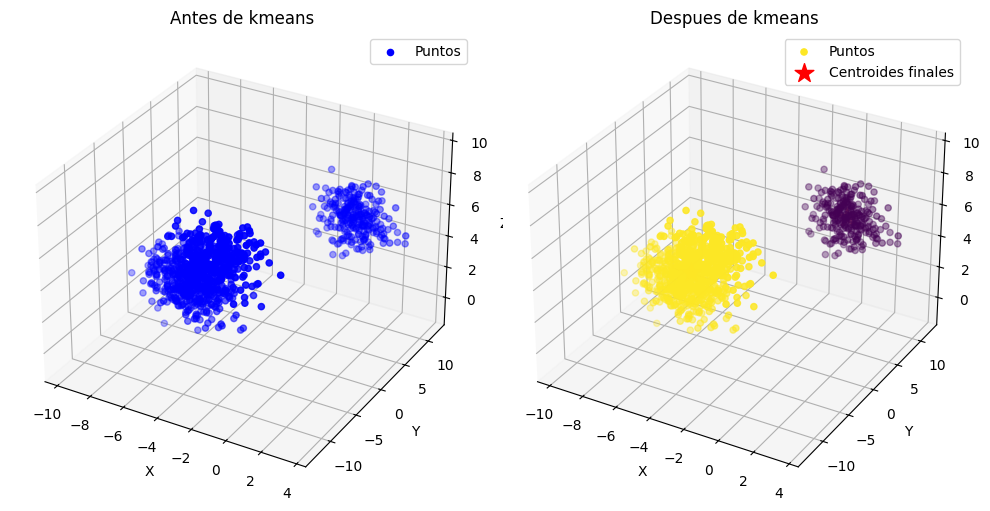

In [103]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)
kmeans = KMeans(k=2, max_iter=10)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

**Buscando convergencia del punto 5 K=3**

[[-5.59637388 -3.77444934  2.9720632 ]
 [-1.87489628 -9.98410468  7.55642675]
 [ 0.28513392  8.92425092  5.20691558]]


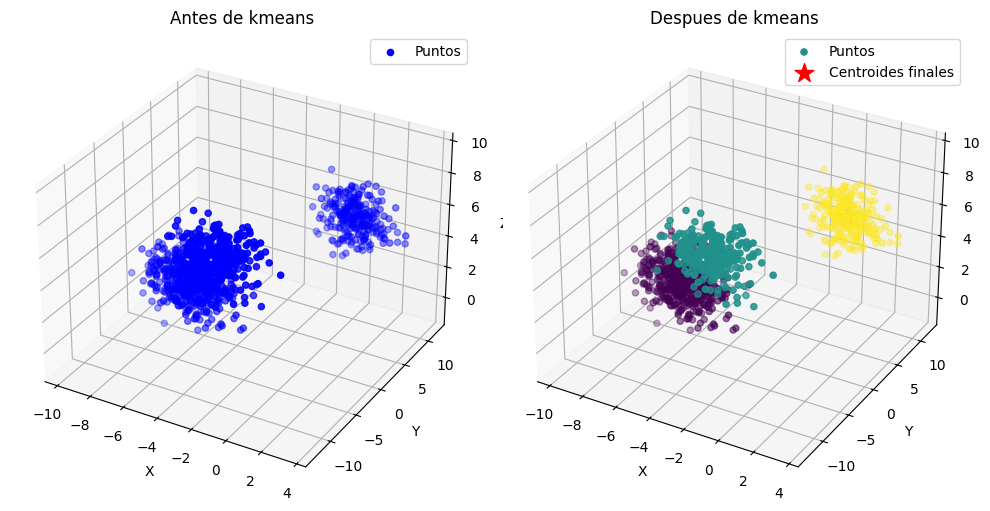

In [99]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=10)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

**Buscando convergencia del punto 5 K=5**

[[ -1.86149261 -10.05708124   7.62571039]
 [ -6.00609178  -2.07971245   2.12829917]
 [  0.28513392   8.92425092   5.20691558]
 [ -4.40957108  -5.54521186   3.59865963]
 [ -7.6248481   -2.03284062   2.69602192]]


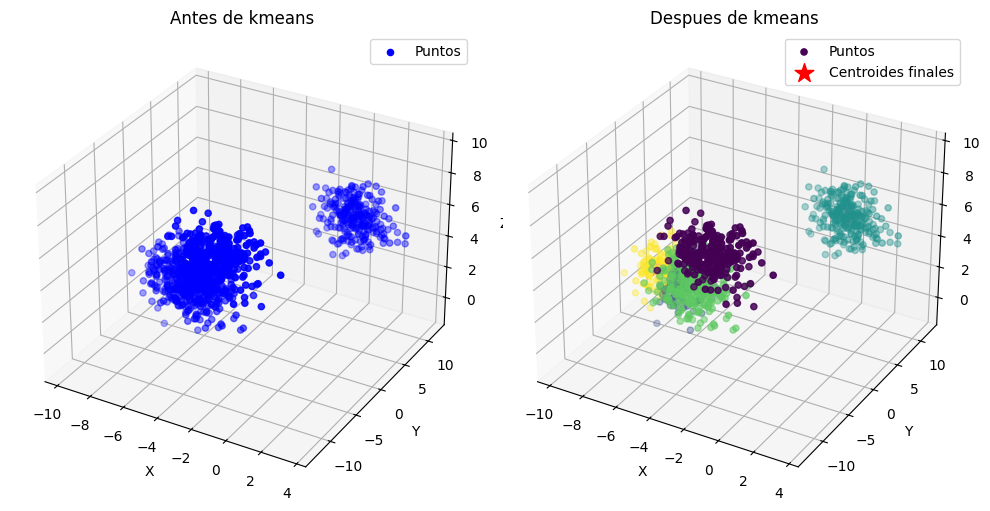

In [126]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)
kmeans = KMeans(k=5, max_iter=1000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

**Buscando convergencia del punto 5 K=10**

[[ -5.92616315  -1.92682069   2.60230358]
 [ -7.49017137  -2.11926083   2.10512514]
 [ -0.9309991  -10.30470837   7.76430988]
 [ -0.57426991   9.45229111   5.21598715]
 [  0.50870922   8.52059341   6.15478734]
 [ -5.07955209  -6.08998041   2.9619989 ]
 [ -3.28269433  -5.78100719   3.70278257]
 [ -2.67305085  -9.84110569   7.50482662]
 [ -4.87058458  -4.67497489   4.16594255]
 [  0.83828173   8.82404072   4.34586817]]


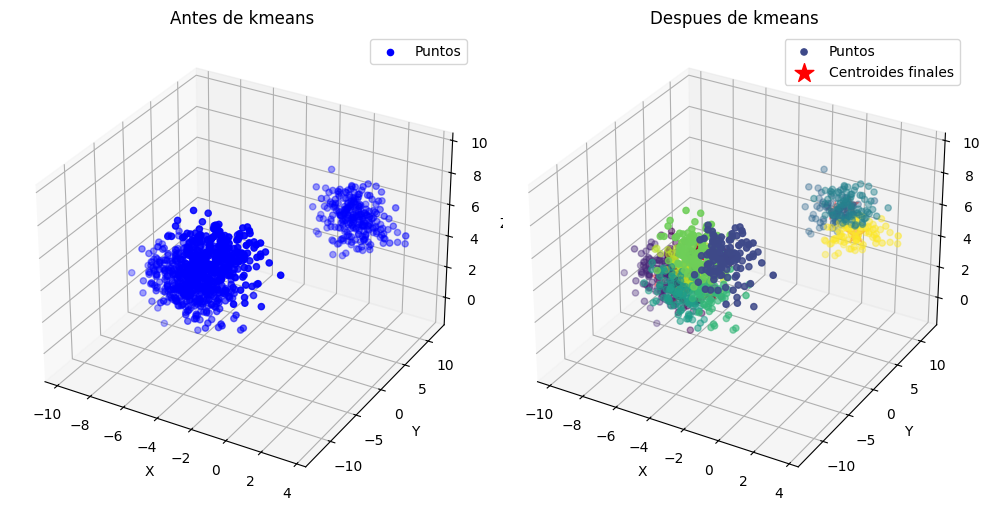

In [101]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)
kmeans = KMeans(k=10, max_iter=100000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

Cuando K fue 2 y 3 no se necesitaron mas de 10 iteraciones para tener las convergencia de los centroide, pero cuando ya se usaron k=5 y K=10 se necesitaron muchasimas mas iteraciones, en el caso de k=5 por lo menos unas 10.000 y en caso de K=10 llegamos a usar 1.000.000 y notabamos muchos cambios en los puntos.

pero nosotros cunmplicos que eso sucedio al ser muchos puntos aletorios, inicialmente que queden al mismo lugar es imposible y a la hora de comenza a calcular los grupos al ser ya mas tienden a molestarse por decirlo asi

**Buscando convergencia del punto 6 distancia euclidiana**

[[-7.14724283 -3.68019111]
 [ 5.22054811 -4.40112225]
 [-7.18997007 -2.73582003]
 [-6.39215046 -1.75196455]
 [-2.70635287  6.32333419]]


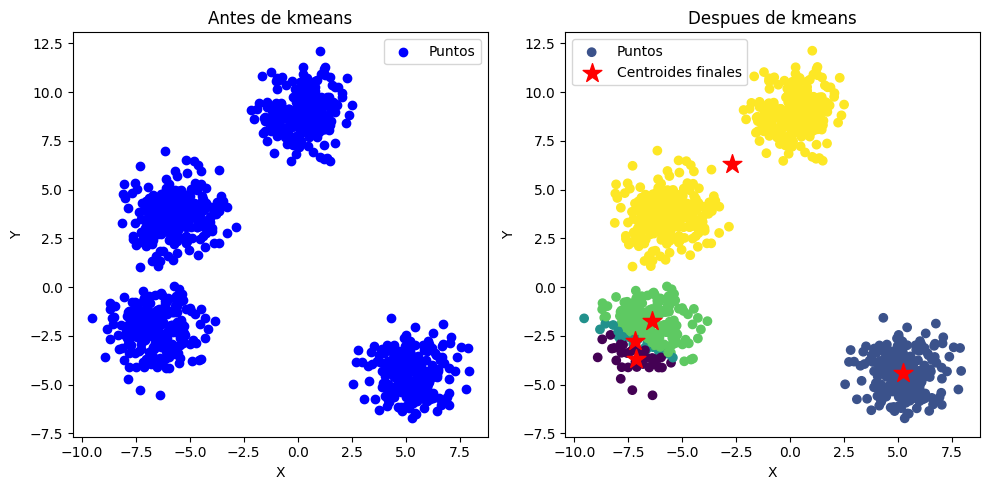

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)
kmeans = KMeans(k=5, max_iter=1)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar2D(points, kmeans.centroids, labels)

**Buscando convergencia del punto 6 distancia manhattan**

[[ 0.24306104  8.92000855]
 [ 5.97249984 -4.6882172 ]
 [ 4.54834883 -4.14447676]
 [-6.59871777 -2.12592069]
 [-5.64587749  3.74810339]]


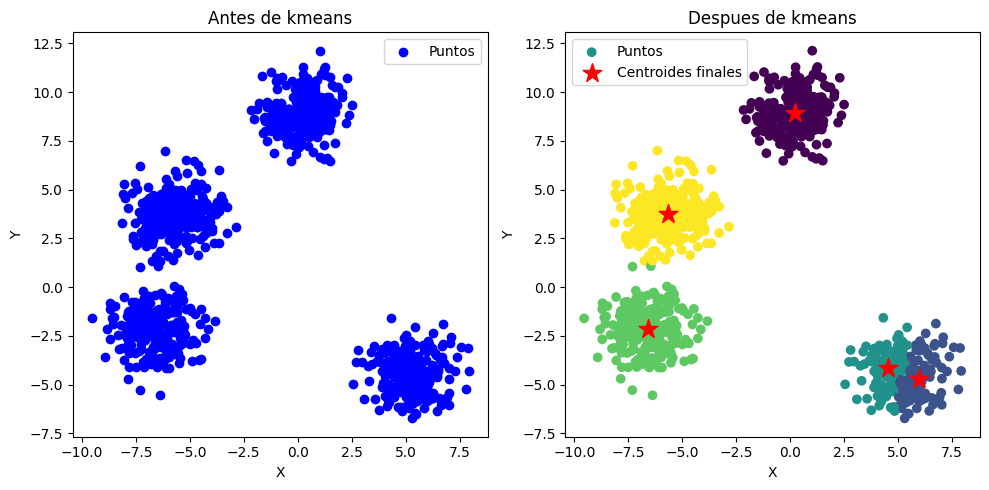

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)
kmeans = KMeans(k=5, max_iter=10)
labels = kmeans.run(points, tipo_distance="manhattan")
#print(labels)
print(kmeans.centroids)
dibujar2D(points, kmeans.centroids, labels)

**Buscando convergencia del punto 6 distancia mahalanobis**

[[ 5.53235956 -3.43281505]
 [ 0.22755648  8.90849082]
 [ 4.27402217 -4.60903204]
 [ 5.84385096 -5.23067933]
 [-6.13107397  0.77709132]]


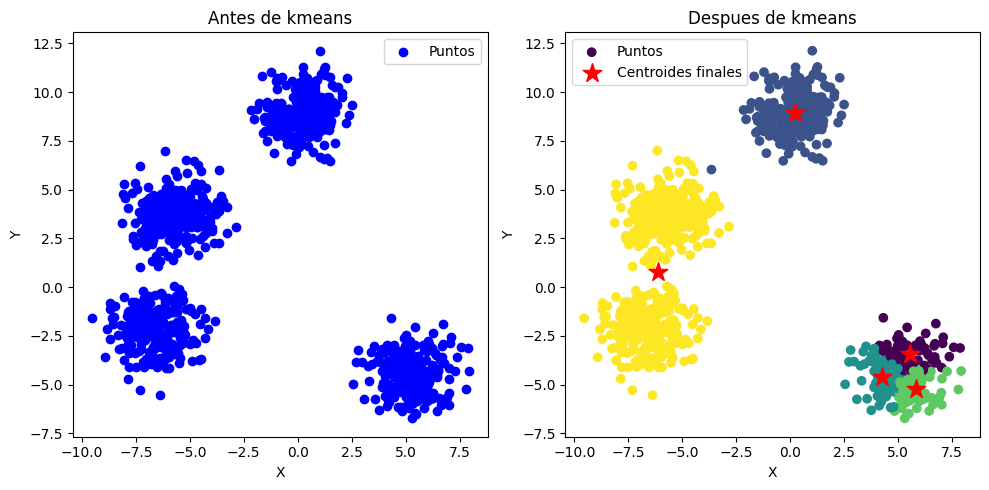

In [102]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)
kmeans = KMeans(k=5, max_iter=10)
labels = kmeans.run(points, tipo_distance="mahalanobis")
#print(labels)
print(kmeans.centroids)
dibujar2D(points, kmeans.centroids, labels)

*En el caso del punto 6, al usar diferencia medias tendio a ser igual, no se necesitaron mas de 10 iteraciones, concluimos que en el rango de 6 a 10 es suficiente y esta rango se debe a que los centroide son generado aleatoriamente*